# Column name explanation

Dataset - https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

Column names are self explanatory.<br>
Some steps to talk are:
- understand our problem statement, predict the price of a car based on provided metrics
- pre process, clean data, split data, feature selection.
- create ML model, test it using different metrics.


In [158]:
#my version
import tensorflow as tf
from tensorflow import keras
#layers for NN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
#oretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [159]:
df = pd.read_csv('car_price.csv')
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [160]:
#remove the first col literally called unnamed
df = df.drop(df.columns[0], axis=1)

# check for nulls
df.info() 

df.shape #5512 rows 9 cols


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


(5512, 9)

In [161]:
df.isnull().sum() #double checking no nulls

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [162]:
df.duplicated().sum() #115 duplicated rows
df.drop_duplicates()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [163]:
df['ownership'].value_counts()

1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: ownership, dtype: int64

In [164]:
# rename engine column to include CC to avoid confusion
df = df.rename(columns={'engine':'engine (cc)'})
df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [165]:
# lambda to remove the ' Seats' from the attribute
df['Seats'] = df['Seats'].apply(lambda x: x.rstrip(' Seats'))
df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5
...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6


In [166]:
# make new column called currency for our two currencies, Lakh and Crore
# 1 Crore = 100 Lakh
# 100,000 Lakh = 1,217.07 USD

df.loc[df['car_prices_in_rupee'].str.contains('Lakh'), 'Currency'] = 'Lakh'
df.loc[df['car_prices_in_rupee'].str.contains('Crore'), 'Currency'] = 'Crore'

In [167]:
# one row (240) has "99,999" in the car price. Remove since d/n have Lakh or Crore
df=df.dropna()

In [168]:
# Continue strip of the columns. Dont need the CC in 1500 'cc' in the engine col
# We want some of our cols to turn into ints
df['engine (cc)'] = df['engine (cc)'].apply(lambda x: x.rstrip(' cc'))
df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' th Owner'))
df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' rd Owner'))
df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' nd Owner'))
df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' st Owner'))
df['kms_driven'] = df['kms_driven'].apply(lambda x: x.rstrip(' kms'))

# some rows have , and . we can remove them now. Same with the Lakh and Crore words at the end
df['kms_driven'] = df['kms_driven'].apply(lambda x: x.replace(',', '')) #31,146 turn into int
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(lambda x: x.rstrip(' Lakh'))
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(lambda x: x.replace('.', ''))
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(lambda x: x.rstrip(' Crore'))

C:\Users\Cenzo Oh\AppData\Local\Temp\ipykernel_16616\3414776288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine (cc)'] = df['engine (cc)'].apply(lambda x: x.rstrip(' cc'))
C:\Users\Cenzo Oh\AppData\Local\Temp\ipykernel_16616\3414776288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' th Owner'))
C:\Users\Cenzo Oh\AppData\Local\Temp\ipykernel_16616\3414776288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [169]:
# turn the car price col into a float
df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype('float') 

# Right now our car price col went from 10.03 Lakh -> 1003
# If the row is Crore (100 times of 1 Lakh) multi it by 100
df['car_prices_in_rupee']=np.where(df['Currency'] == 'Crore',
                                           df['car_prices_in_rupee'] * 100,
                                           df['car_prices_in_rupee'])

# Now all rows are sort of in Lakh (still in that 10.03 state) multi by 100K now
df['car_prices_in_rupee']=df['car_prices_in_rupee']*1000
df

C:\Users\Cenzo Oh\AppData\Local\Temp\ipykernel_16616\2159430307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype('float')
C:\Users\Cenzo Oh\AppData\Local\Temp\ipykernel_16616\2159430307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_prices_in_rupee']=np.where(df['Currency'] == 'Crore',
C:\Users\Cenzo Oh\AppData\Local\Temp\ipykernel_16616\2159430307.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1,2016,2494,5,Lakh
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1,2016,1199,5,Lakh
...,...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,2890000.0,45000,Diesel,Automatic,1,2018,2995,7,Lakh
5508,BMW M Series M4 Coupe,6490000.0,29000,Petrol,Automatic,2,2015,1968,5,Lakh
5509,Jaguar XF 2.2 Litre Luxury,1375000.0,90000,Diesel,Automatic,2,2013,2755,5,Lakh
5510,BMW 7 Series 730Ld,2990000.0,79000,Diesel,Automatic,3,2015,2967,6,Lakh


In [170]:
# df=pd.get_dummies(df,columns='')

# Change the types of cols to ints for kms driven, ownership, engine, etc
df = df.astype({'kms_driven':'int64', 'ownership':'int64', 'engine (cc)': 'int64', 'Seats': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5389 non-null   object 
 1   car_prices_in_rupee  5389 non-null   float64
 2   kms_driven           5389 non-null   int64  
 3   fuel_type            5389 non-null   object 
 4   transmission         5389 non-null   object 
 5   ownership            5389 non-null   int64  
 6   manufacture          5389 non-null   int64  
 7   engine (cc)          5389 non-null   int64  
 8   Seats                5389 non-null   int64  
 9   Currency             5389 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 463.1+ KB


In [171]:
# correct ruppe price 1003000 let us turn it into USD price of 12,231
# Do this by / 82. 82 Rupee = 1 USD
df['car_prices_in_rupee']=df['car_prices_in_rupee']/82
df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,12231.707317,86226,Diesel,Manual,1,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,15646.341463,13248,Petrol,Automatic,1,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,20000.000000,60343,Petrol,Automatic,1,2016,2494,5,Lakh
3,Honda Jazz VX CVT,9475.609756,26696,Petrol,Automatic,1,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,6280.487805,69414,Petrol,Manual,1,2016,1199,5,Lakh
...,...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,35243.902439,45000,Diesel,Automatic,1,2018,2995,7,Lakh
5508,BMW M Series M4 Coupe,79146.341463,29000,Petrol,Automatic,2,2015,1968,5,Lakh
5509,Jaguar XF 2.2 Litre Luxury,16768.292683,90000,Diesel,Automatic,2,2013,2755,5,Lakh
5510,BMW 7 Series 730Ld,36463.414634,79000,Diesel,Automatic,3,2015,2967,6,Lakh


In [172]:
#change rupee col name to be in USD
df = df.rename(columns={'car_prices_in_rupee':'car_price_in_usd'})
df.head()

,car_name,car_price_in_usd,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,12231.707317,86226,Diesel,Manual,1,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,15646.341463,13248,Petrol,Automatic,1,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,20000.000000,60343,Petrol,Automatic,1,2016,2494,5,Lakh
3,Honda Jazz VX CVT,9475.609756,26696,Petrol,Automatic,1,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,6280.487805,69414,Petrol,Manual,1,2016,1199,5,Lakh


In [173]:
# lets also remove the extra decimal places in car price, lets make it 12231.70
df['car_price_in_usd'] = df['car_price_in_usd'].round(decimals = 2)

#
# df['car_price_in_usd'] = round(df['car_price_in_usd'], 2)

df.head()

,car_name,car_price_in_usd,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,86226,Diesel,Manual,1,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,15646.34,13248,Petrol,Automatic,1,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,20000.00,60343,Petrol,Automatic,1,2016,2494,5,Lakh
3,Honda Jazz VX CVT,9475.61,26696,Petrol,Automatic,1,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,6280.49,69414,Petrol,Manual,1,2016,1199,5,Lakh


In [174]:
# Drop the currency column
df = df.drop(['Currency'], axis=1)
df.head()

,car_name,car_price_in_usd,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,86226,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,15646.34,13248,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,20000.00,60343,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,9475.61,26696,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,6280.49,69414,Petrol,Manual,1,2016,1199,5


In [175]:
# Convert KMS to Miles, we will keep col as an integer. 
# 86,226 KMS = 53,578 (again no decimal palces)
df['kms_driven'] = df['kms_driven'] * 0.621371
df.head()

,car_name,car_price_in_usd,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,53578.335846,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,15646.34,8231.923008,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,20000.00,37495.390253,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,9475.61,16588.120216,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,6280.49,43131.846594,Petrol,Manual,1,2016,1199,5


In [176]:
# convert col back to integer dont want float type
df = df.astype({'kms_driven':'int64'})
df.head()

,car_name,car_price_in_usd,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,53578,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,15646.34,8231,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,20000.00,37495,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,9475.61,16588,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,6280.49,43131,Petrol,Manual,1,2016,1199,5


In [177]:
# change col name to miles driven
df = df.rename(columns={'kms_driven':'miles_driven'})

# data is now finally clean
df.head()

,car_name,car_price_in_usd,miles_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,53578,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,15646.34,8231,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,20000.00,37495,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,9475.61,16588,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,6280.49,43131,Petrol,Manual,1,2016,1199,5


<AxesSubplot:title={'center':'Average car price by Year'}, xlabel='manufacture'>

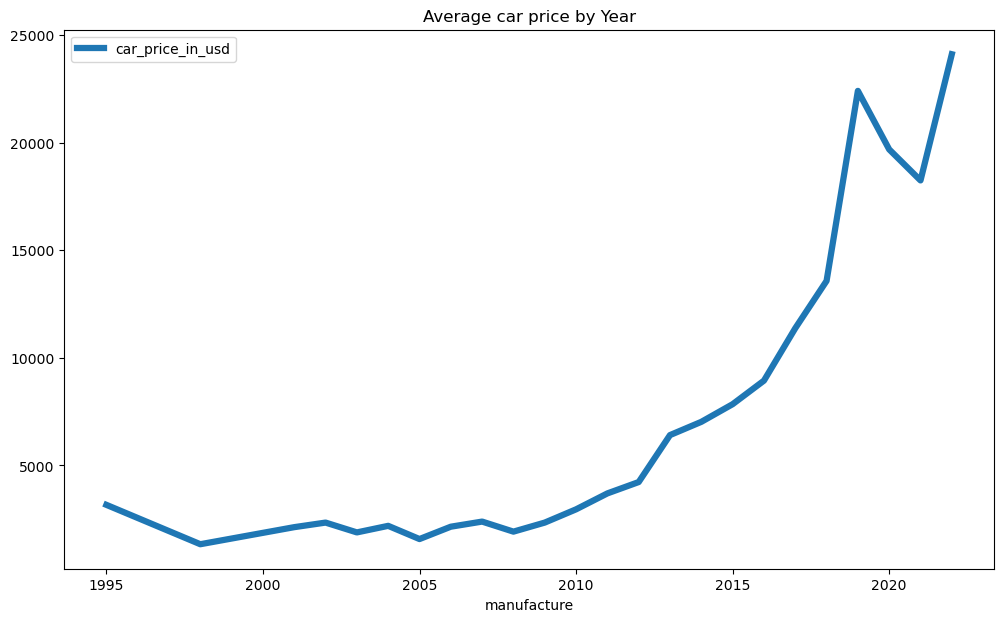

In [178]:
#plot our data

pv1=pd.pivot_table(
    df, 
    index=['manufacture'],
    values = ['car_price_in_usd'],
    aggfunc = 'mean') 
pv1.plot(
    kind='line',
    linewidth=4.5,
    figsize=(12,7),
    title='Average car price by Year')

In [179]:
#Machine Learning
train_df = df
train_df = pd.get_dummies(df, columns=['ownership', 'transmission', 'fuel_type', 'manufacture', 'Seats'], drop_first=True)

Y = train_df['car_price_in_usd']
X = train_df.drop(columns=['car_price_in_usd', 'car_name'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 100) #Another is size = 0.2, random = 45
print("Rows and Columns training data: ", X_train.shape)
print("Rows and Columns testing data: ", y_test.shape)


Rows and Columns training data:  (4580, 40)
Rows and Columns testing data:  (809,)


In [180]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [181]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
#compile fcn operates inpalce, we dont retrun the model. Remember fit from sklearn

In [182]:
train_df.info() # we dont want the car name since it is string value, only want num for model

#  #   Column               Non-Null Count  Dtype  
# ---  ------               --------------  -----  
#  0   car_name             5389 non-null   object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 5511
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5389 non-null   object 
 1   car_price_in_usd     5389 non-null   float64
 2   miles_driven         5389 non-null   int64  
 3   engine (cc)          5389 non-null   int64  
 4   ownership_1          5389 non-null   uint8  
 5   ownership_2          5389 non-null   uint8  
 6   ownership_3          5389 non-null   uint8  
 7   ownership_4          5389 non-null   uint8  
 8   ownership_5          5389 non-null   uint8  
 9   transmission_Manual  5389 non-null   uint8  
 10  fuel_type_Diesel     5389 non-null   uint8  
 11  fuel_type_Electric   5389 non-null   uint8  
 12  fuel_type_Lpg        5389 non-null   uint8  
 13  fuel_type_Petrol     5389 non-null   uint8  
 14  manufacture_1998     5389 non-null   uint8  
 15  manufacture_2001     5389 non-null   u

In [183]:
epoch = 100
model.fit(X_train, y_train, epochs=epoch, validation_split=0.1)

Epoch 1/100
129/129 [==============================] - 1s 2ms/step - loss: -3721840896.0000 - acc: 0.0000e+00 - val_loss: -12117070848.0000 - val_acc: 0.0000e+00
Epoch 2/100
129/129 [==============================] - 0s 1ms/step - loss: -56776101888.0000 - acc: 0.0000e+00 - val_loss: -113534451712.0000 - val_acc: 0.0000e+00
Epoch 3/100
129/129 [==============================] - 0s 1ms/step - loss: -294251921408.0000 - acc: 0.0000e+00 - val_loss: -453713100800.0000 - val_acc: 0.0000e+00
Epoch 4/100
129/129 [==============================] - 0s 1ms/step - loss: -885629779968.0000 - acc: 0.0000e+00 - val_loss: -1176493096960.0000 - val_acc: 0.0000e+00
Epoch 5/100
129/129 [==============================] - 0s 1ms/step - loss: -1979464941568.0000 - acc: 0.0000e+00 - val_loss: -2392627871744.0000 - val_acc: 0.0000e+00
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: -3720120107008.0000 - acc: 0.0000e+00 - val_loss: -4218597670912.0000 - val_acc: 0.0000e+00
Epoch 7/1

In [184]:
#evaluate model
model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 800us/step - loss: -7926711647731712.0000 - acc: 0.0000e+00


[-7926711647731712.0, 0.0]

In [185]:
model.evaluate()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>